# Step 1: Load the Data

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Time-Wasters on Social Media.csv'
data = pd.read_csv(file_path)

# Step 2: Show the First 5 Rows


In [ ]:
# Display the first 5 rows of the dataset
data.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


# Step 3: Print Information About the Data


In [ ]:
# Print information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

# Step 4: Plot the Number of Null Values in the Dataset


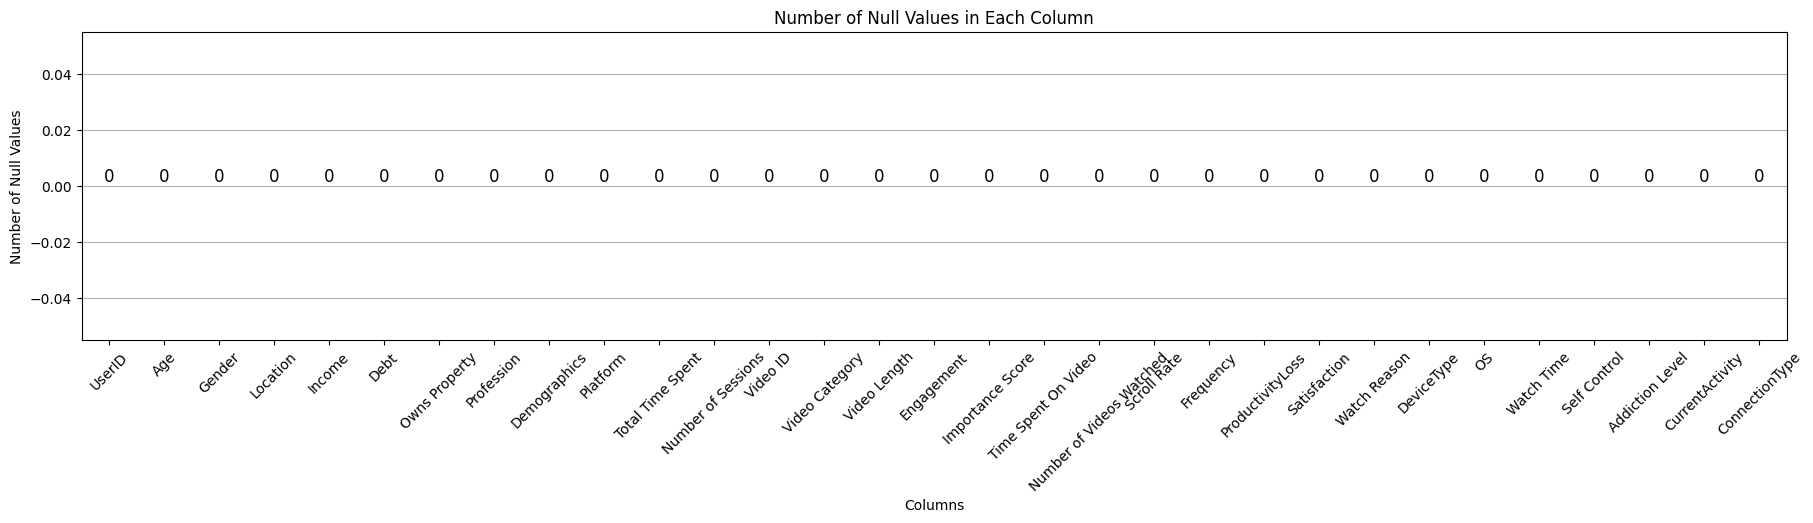

In [ ]:
import matplotlib.pyplot as plt

# Count the number of null values in each column
null_counts = data.isnull().sum()

# Plot the number of null values
plt.figure(figsize=(22, 4))
bars = null_counts.plot(kind='bar', color='skyblue')

# Add labels to each bar
for bar in bars.patches:
    plt.annotate(
        bar.get_height(),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Step 5: Categorical Plot (Histogram or Bar Chart)


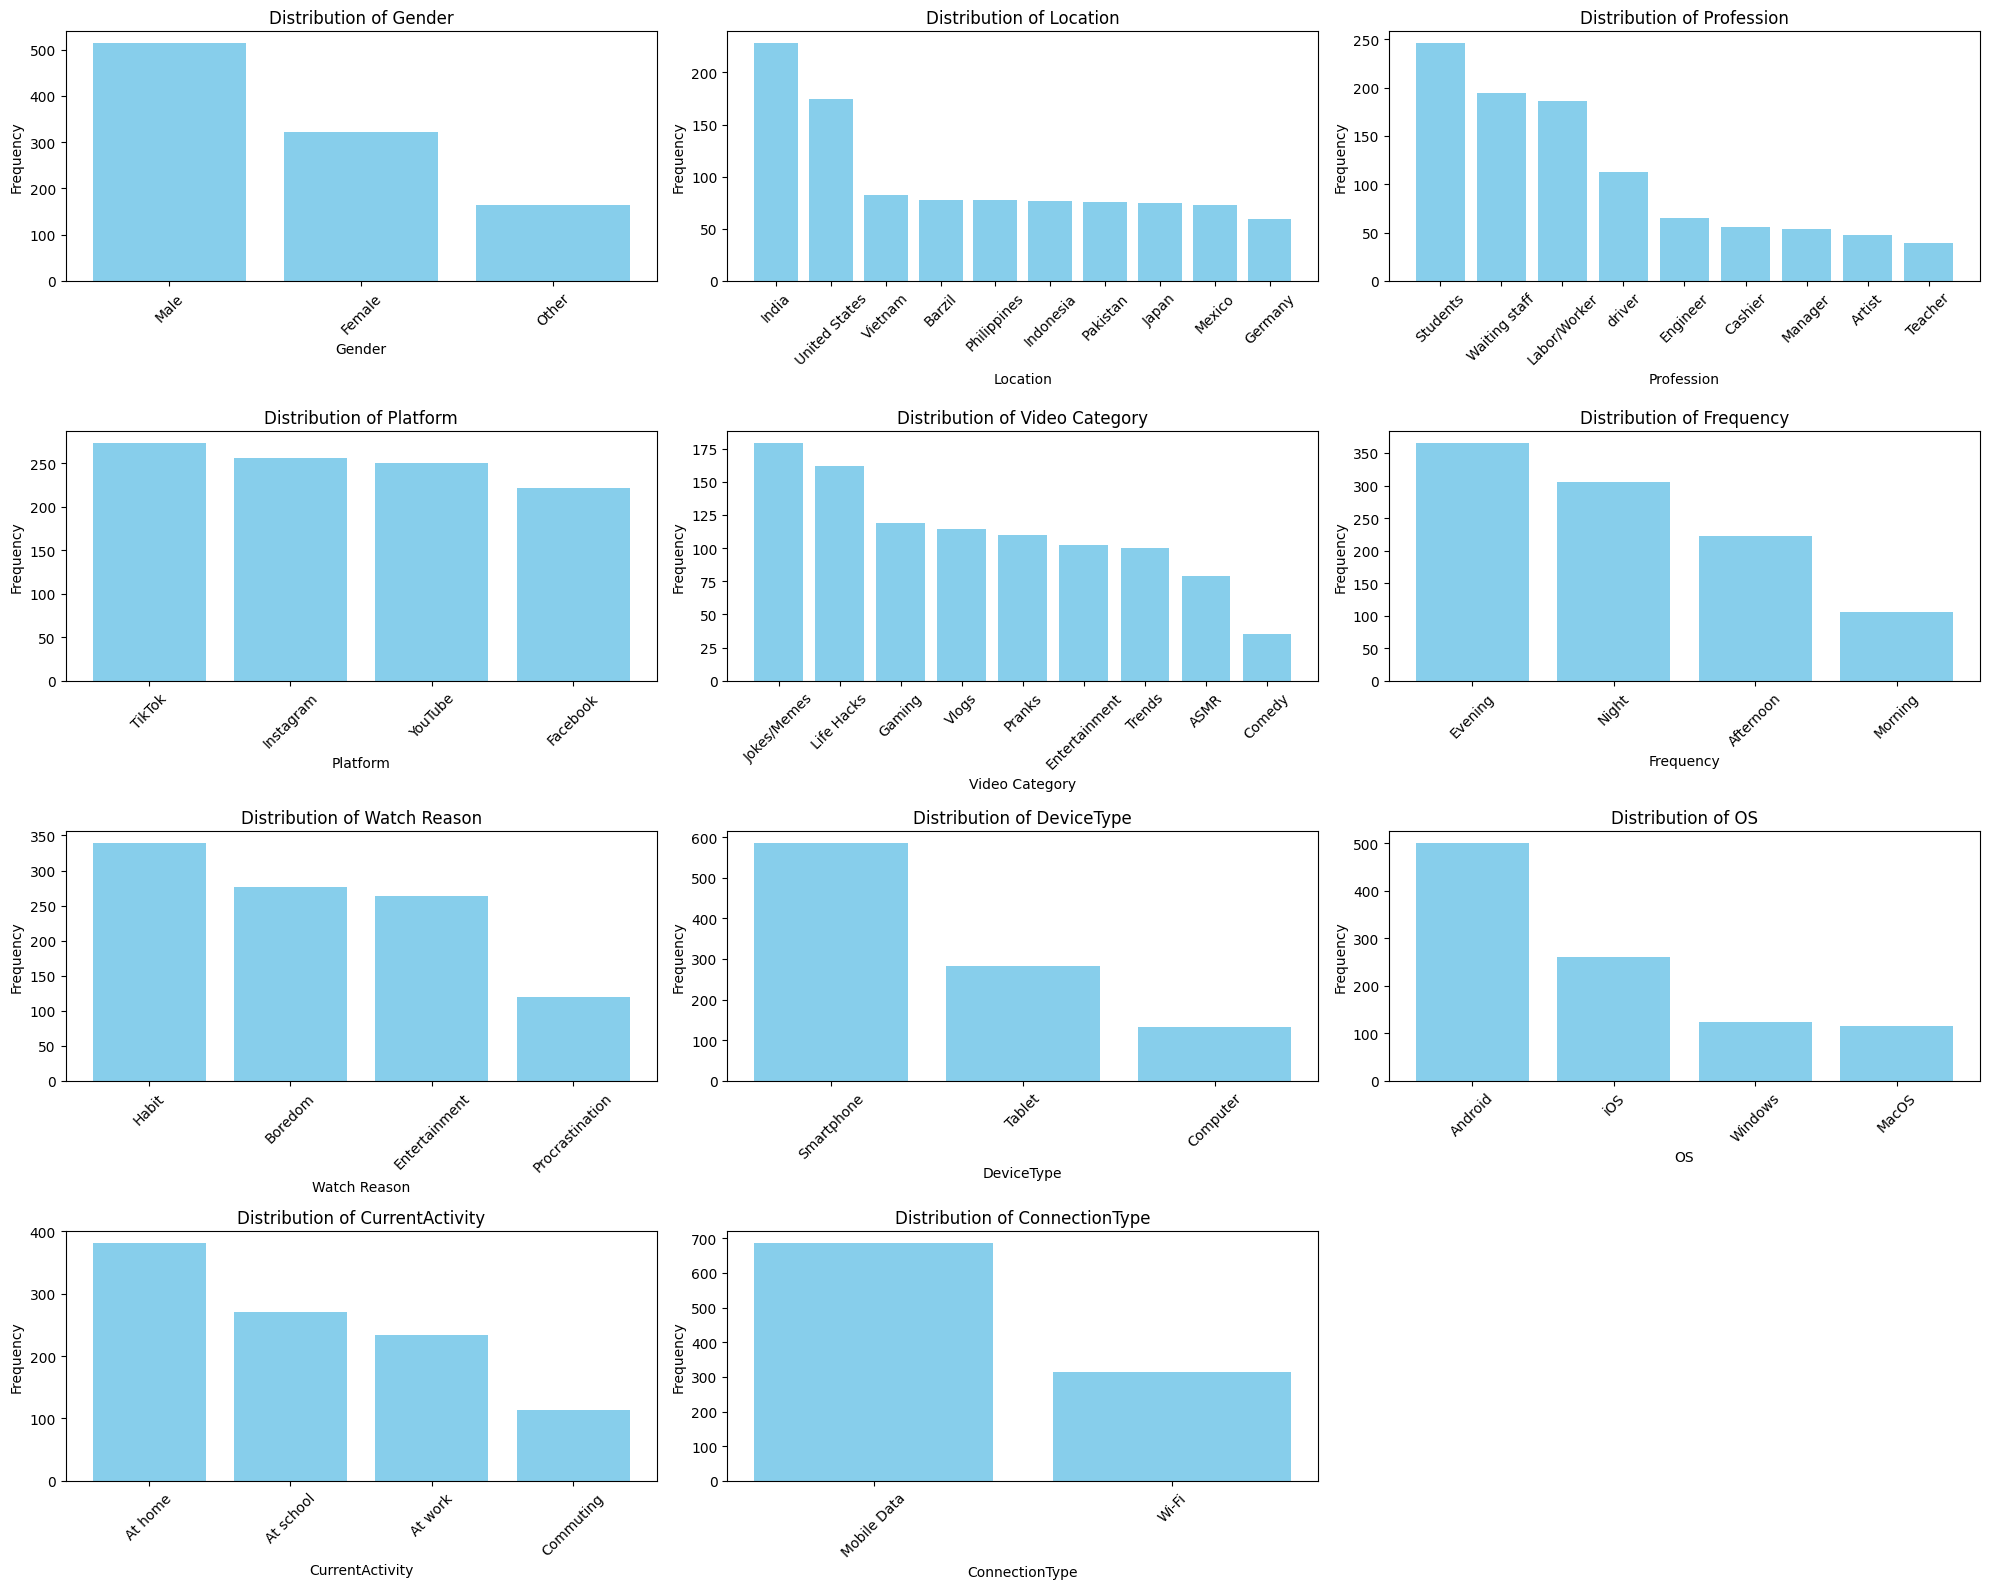

In [ ]:
import matplotlib.pyplot as plt

def plot_categorical_distributions(data, categorical_columns):
    """
    Plots the distribution of categorical variables from the dataset.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    categorical_columns (list): A list of categorical column names to plot.

    This function creates a series of bar plots representing the frequency
    of each category within the specified categorical columns.
    """
    # Create subplots
    num_cols = 3  # Number of columns for subplots
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

    # Plot each categorical variable
    for i, column in enumerate(categorical_columns):
        value_counts = data[column].value_counts()
        axes[i].bar(value_counts.index, value_counts.values, color='skyblue')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# List of categorical columns to plot
categorical_columns = [
    'Gender', 'Location', 'Profession', 'Platform',
    'Video Category', 'Frequency', 'Watch Reason',
    'DeviceType', 'OS', 'CurrentActivity', 'ConnectionType'
]

# Call the function with the dataset
plot_categorical_distributions(data, categorical_columns)


# Step 6: Relational Plot (Scatter Plot)

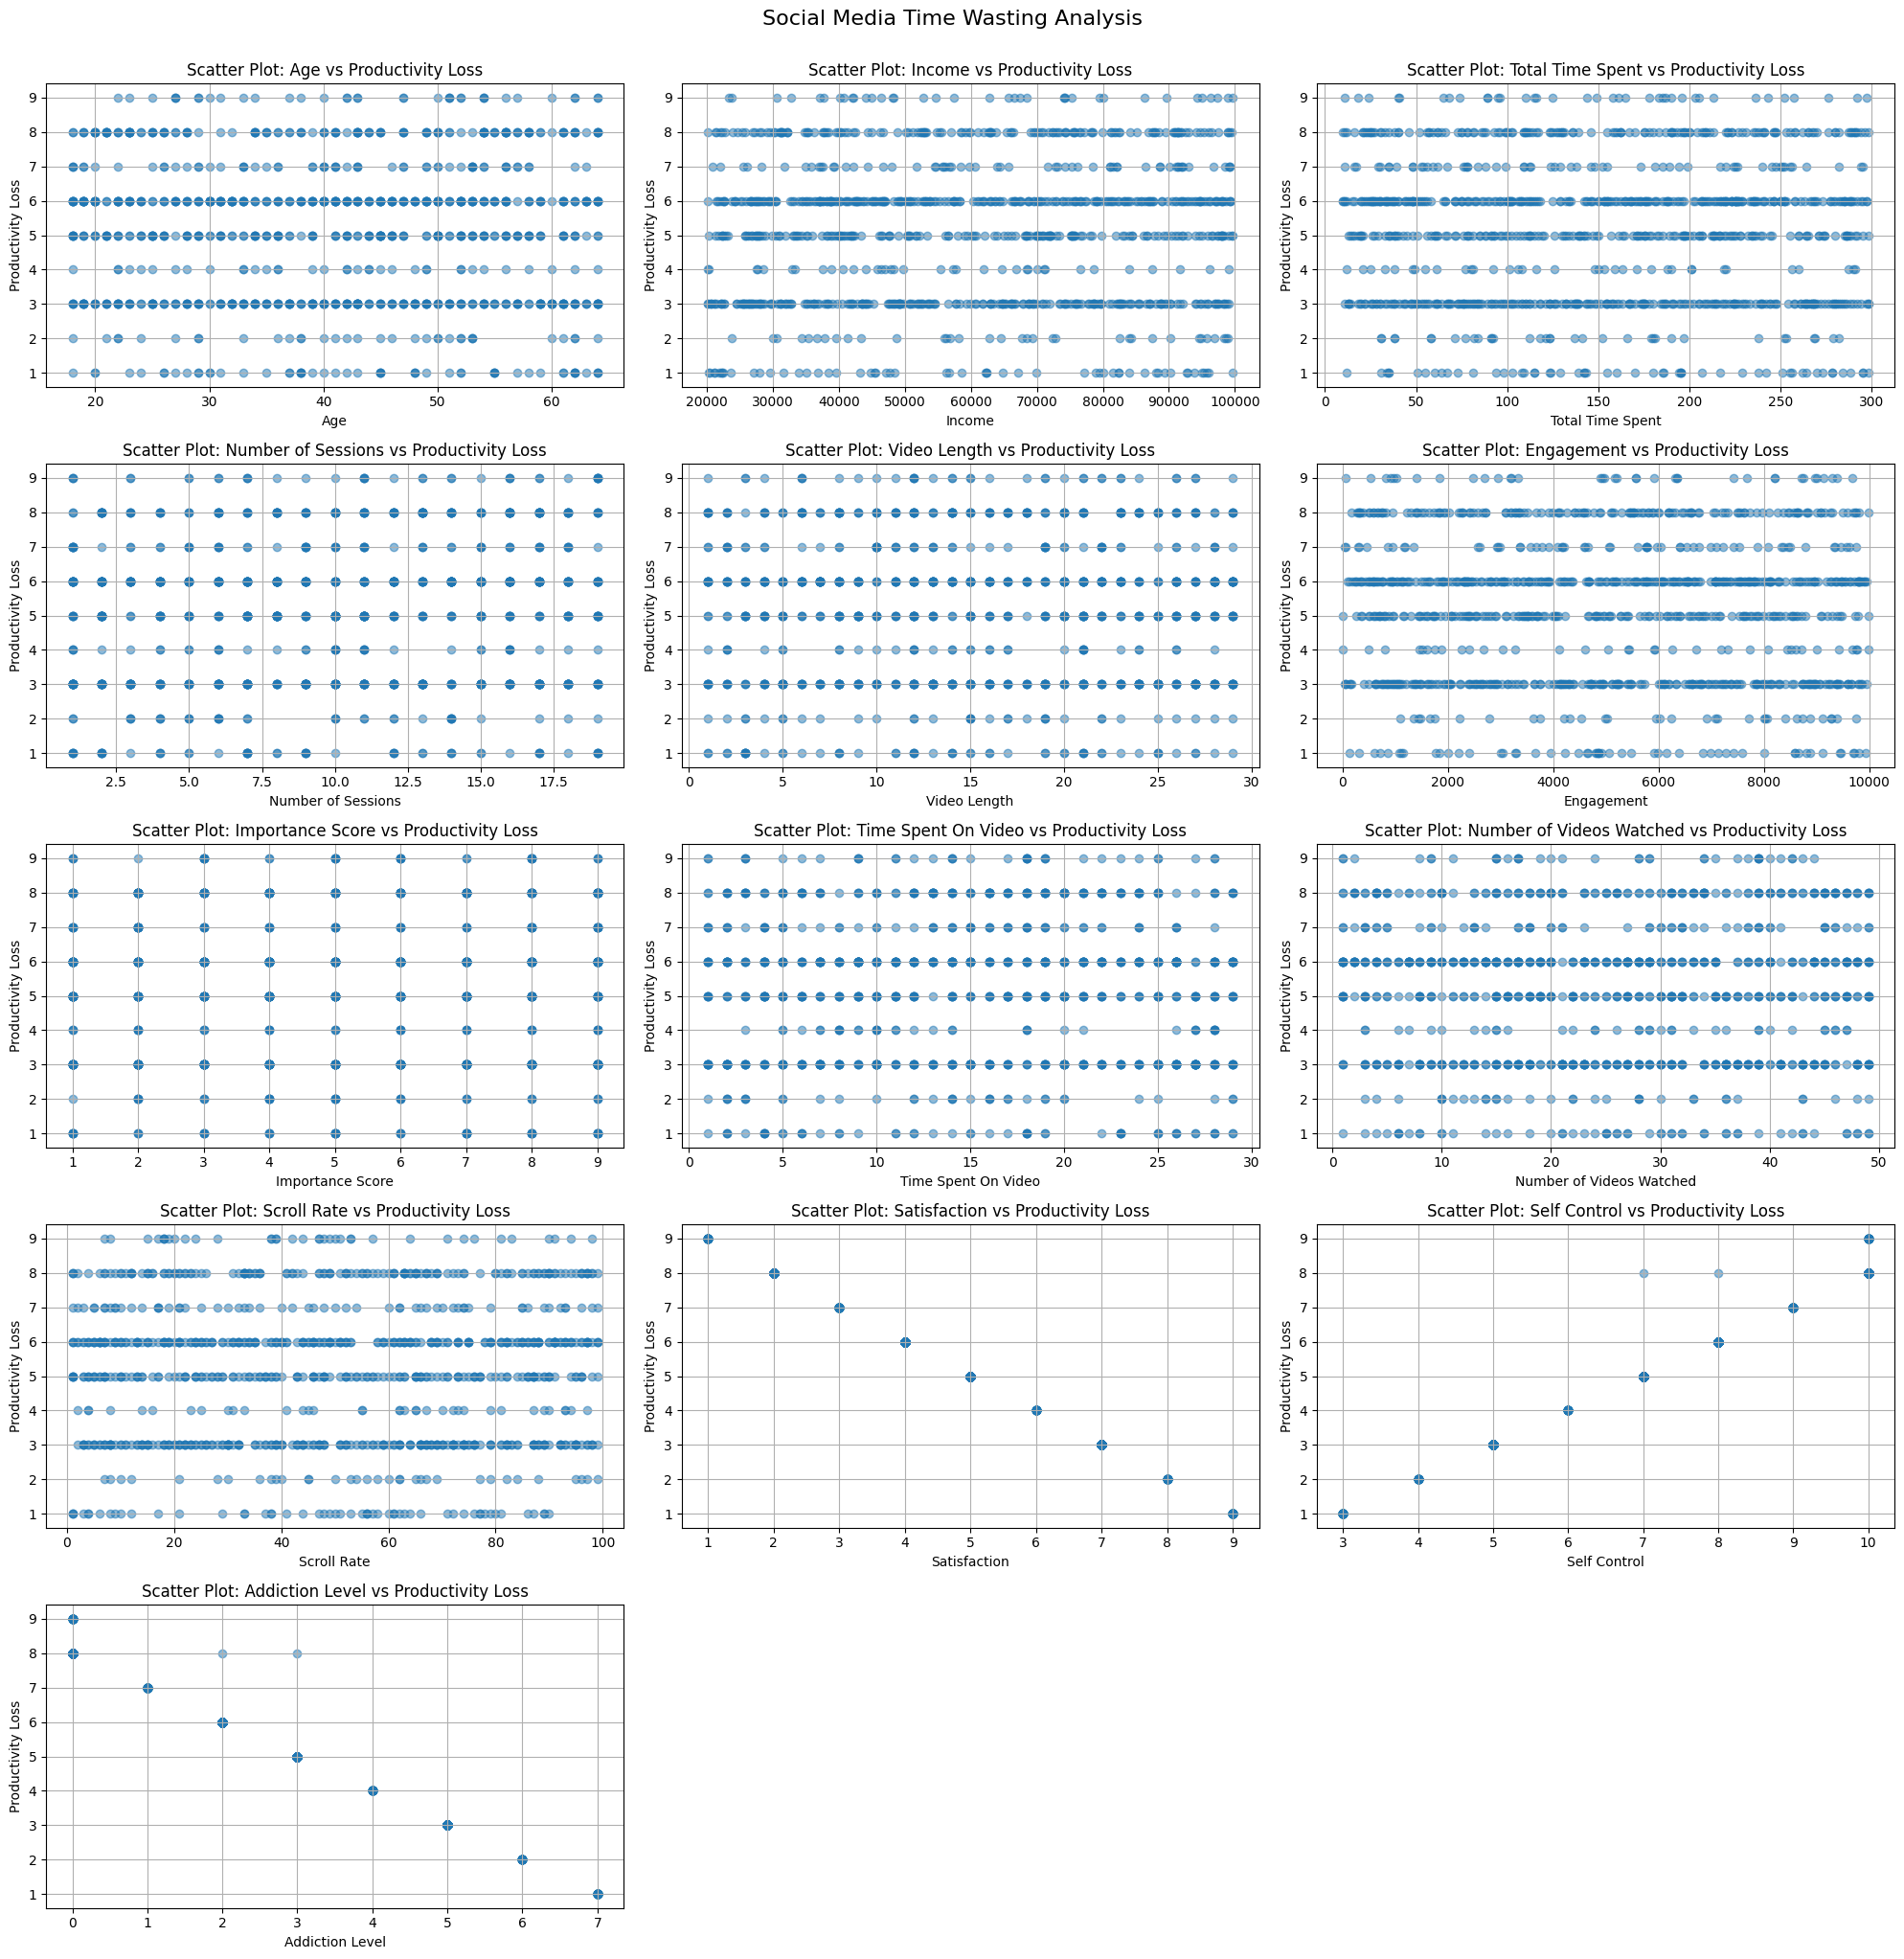

In [ ]:
import matplotlib.pyplot as plt

def plot_numerical_vs_productivity_loss(data, numerical_columns):
    """
    Plots scatter plots of numerical variables against Productivity Loss.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    numerical_columns (list): A list of numerical column names to plot against Productivity Loss.

    This function creates a series of scatter plots representing the relationship
    between each numerical variable and the target variable, Productivity Loss.
    """
    # Create subplots
    num_cols = 3  # Number of columns for subplots
    num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

    # Plot each numerical variable against Productivity Loss
    for i, column in enumerate(numerical_columns):
        axes[i].scatter(data[column], data['ProductivityLoss'], alpha=0.5)
        axes[i].set_title(f'Scatter Plot: {column} vs Productivity Loss')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Productivity Loss')
        axes[i].grid()

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.suptitle('Social Media Time Wasting Analysis', fontsize=16, y=1.02)  # Overall title
    plt.show()

# List of numerical columns to plot against ProductivityLoss
numerical_columns = [
    'Age', 'Income', 'Total Time Spent', 'Number of Sessions',
    'Video Length', 'Engagement', 'Importance Score',
    'Time Spent On Video', 'Number of Videos Watched',
    'Scroll Rate', 'Satisfaction', 'Self Control', 'Addiction Level'
]

# Call the function with the dataset
plot_numerical_vs_productivity_loss(data, numerical_columns)


# Step 7: Statistical Plot (Box Plot and Heatmap)


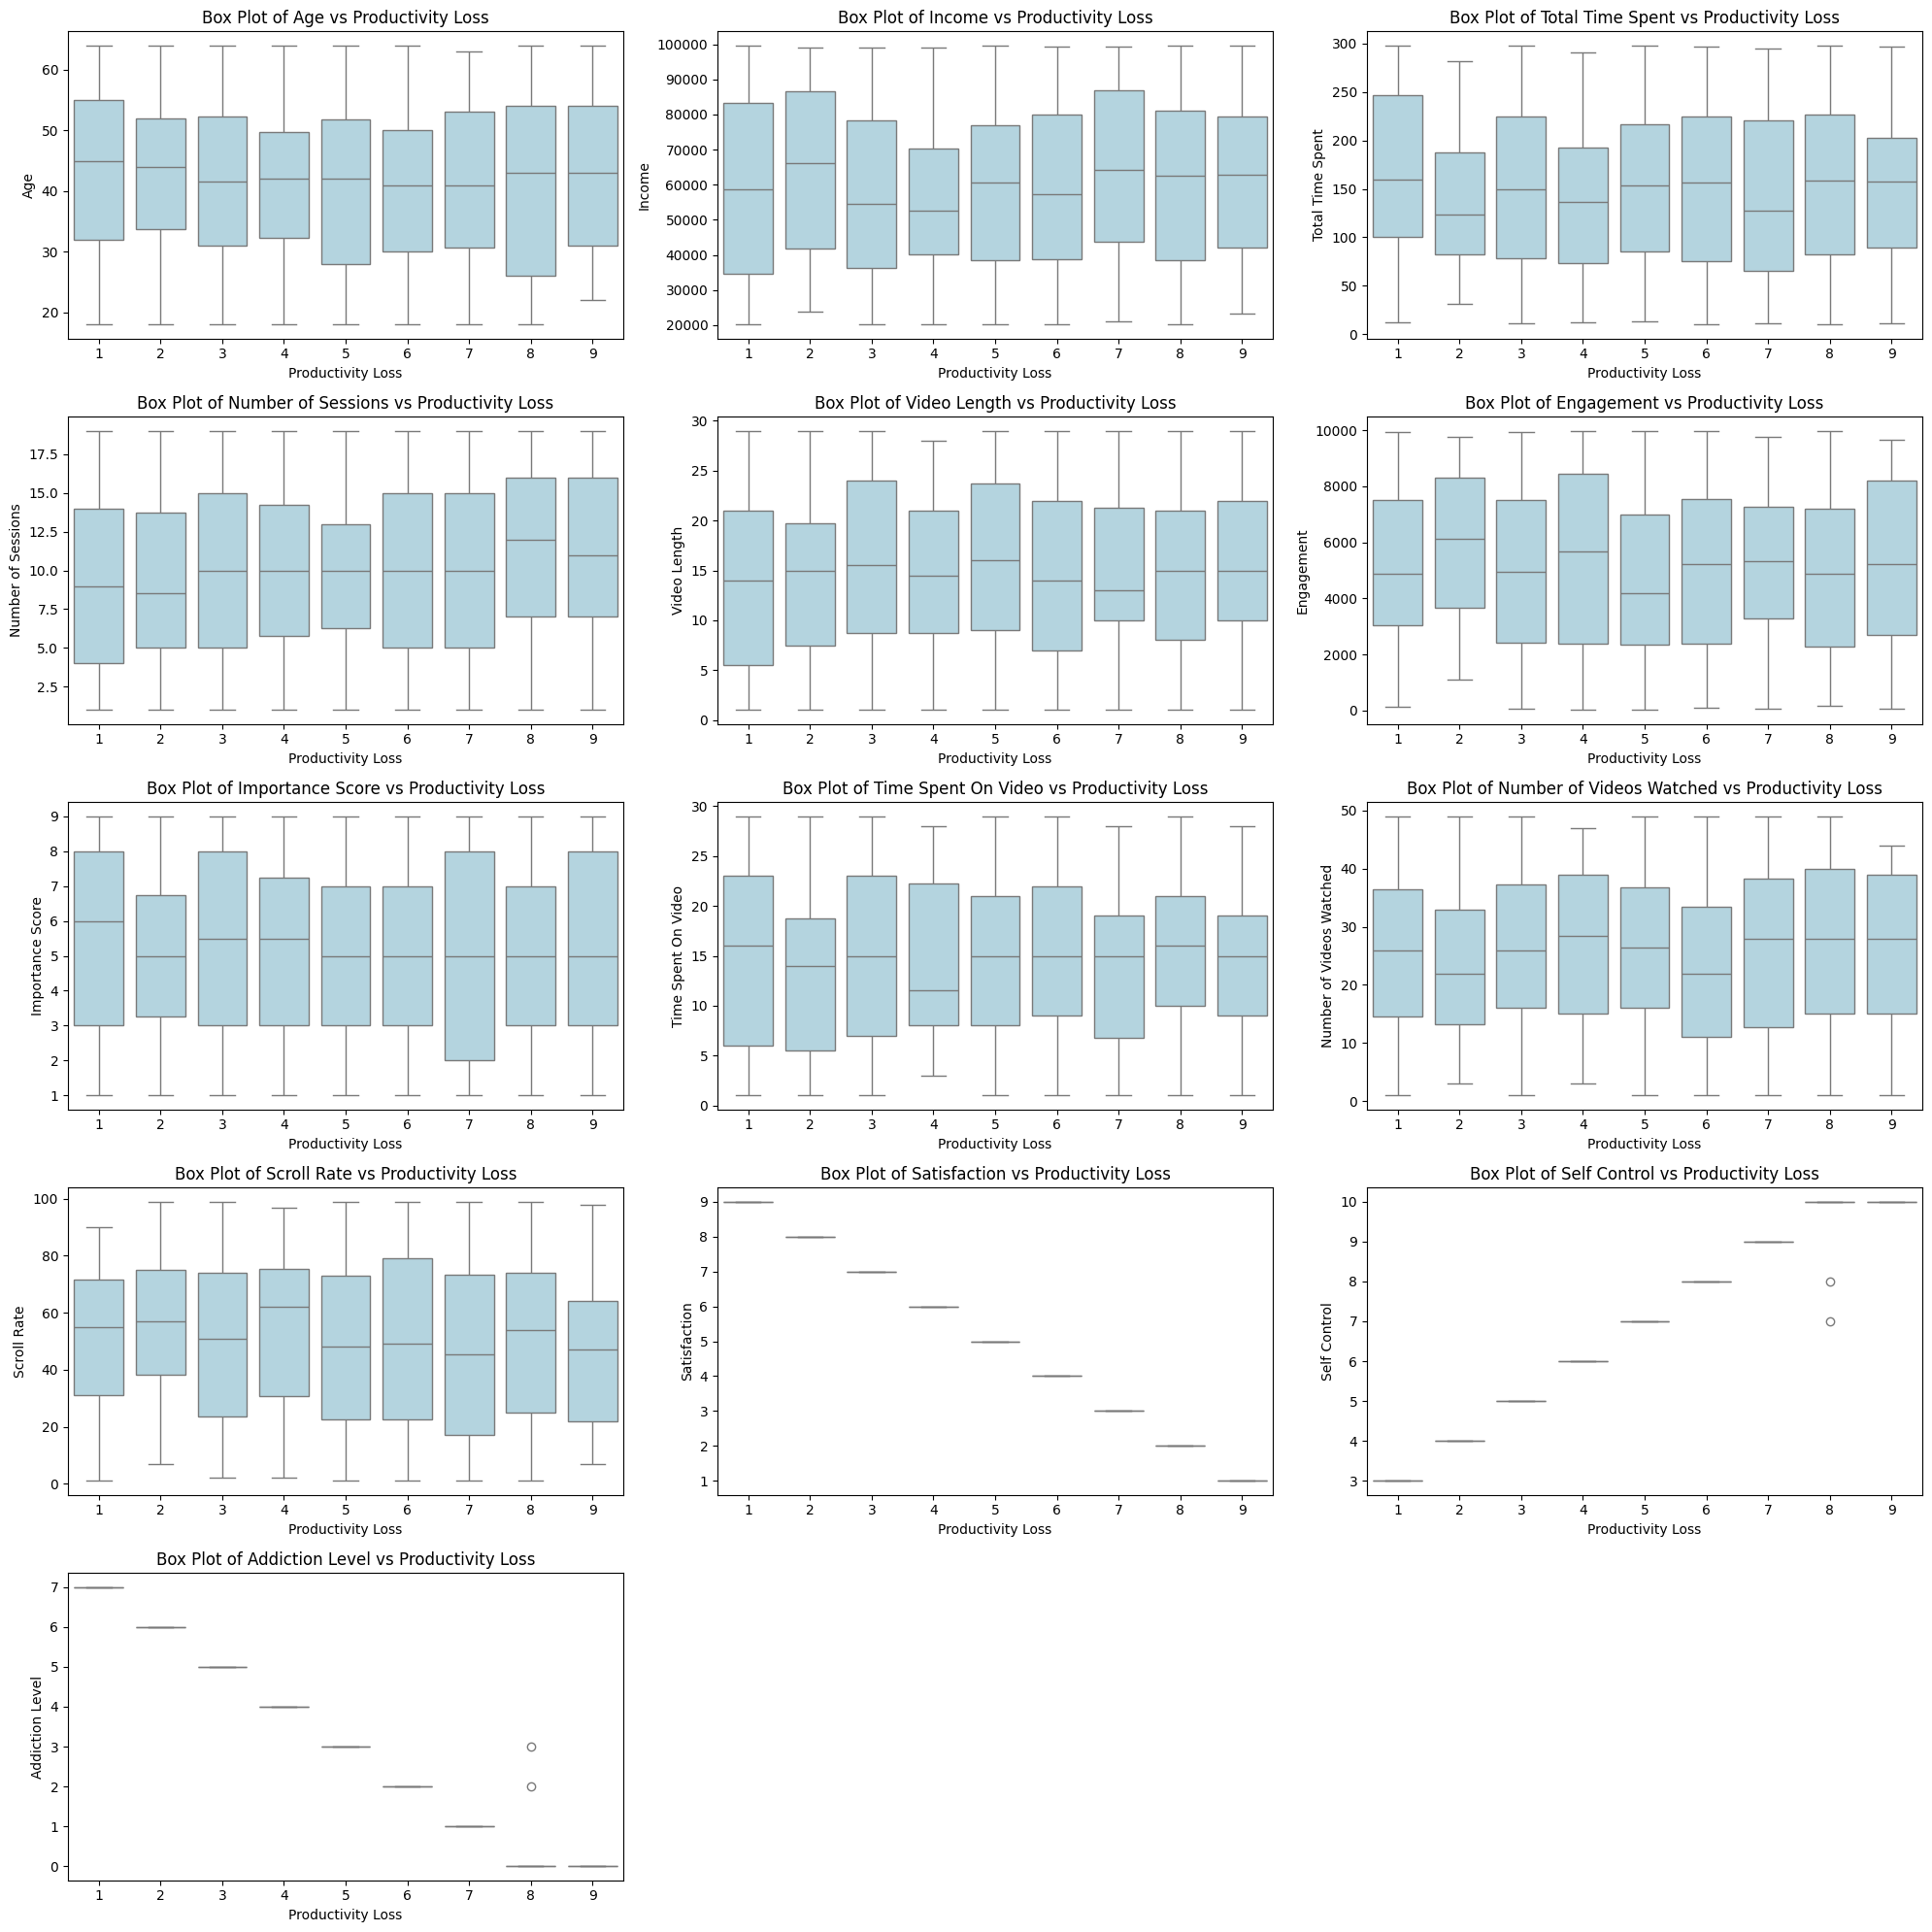

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots_vs_productivity_loss(data, numerical_columns):
    """
    Plots box plots of numerical variables with respect to Productivity Loss.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    numerical_columns (list): A list of numerical column names to plot against Productivity Loss.

    This function creates a series of box plots representing the distribution of
    each numerical variable in relation to the target variable, Productivity Loss.
    """
    # Create subplots for box plots
    num_cols = 3  # Number of columns for subplots
    num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

    # Plot each numerical variable as a box plot with respect to ProductivityLoss
    for i, column in enumerate(numerical_columns):
        sns.boxplot(x='ProductivityLoss', y=column, data=data, ax=axes[i], color='lightblue')
        axes[i].set_title(f'Box Plot of {column} vs Productivity Loss')
        axes[i].set_xlabel('Productivity Loss')
        axes[i].set_ylabel(column)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# List of numerical columns to plot with respect to ProductivityLoss
numerical_columns = [
    'Age', 'Income', 'Total Time Spent', 'Number of Sessions',
    'Video Length', 'Engagement', 'Importance Score',
    'Time Spent On Video', 'Number of Videos Watched',
    'Scroll Rate', 'Satisfaction', 'Self Control', 'Addiction Level'
]

# Call the function with the dataset
plot_boxplots_vs_productivity_loss(data, numerical_columns)


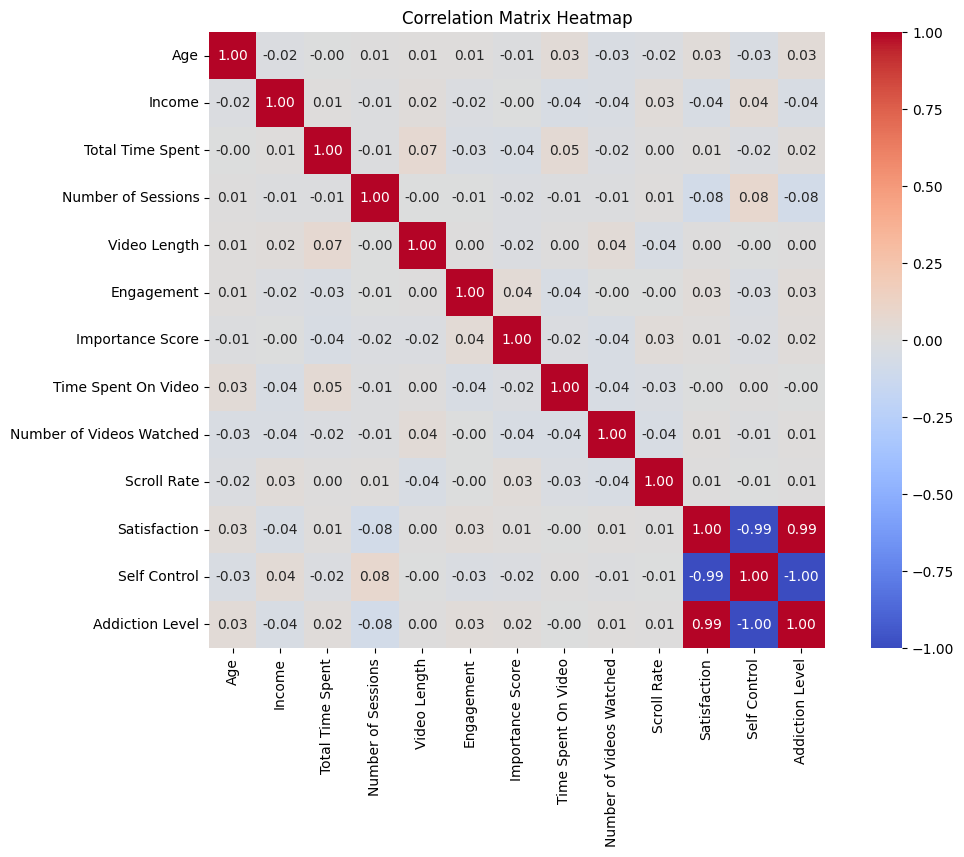

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(data, numerical_columns):
    """
    Plots a correlation matrix heatmap for specified numerical variables.

    Parameters:
    data (DataFrame): The pandas DataFrame containing the data.
    numerical_columns (list): A list of numerical column names to calculate correlations.

    This function calculates the correlation matrix for the specified numerical variables
    and visualizes it using a heatmap, with correlation coefficients annotated on the heatmap.
    """
    # Calculate the correlation matrix
    correlation_matrix = data[numerical_columns].corr()

    # Plotting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# List of numerical columns to calculate correlations
numerical_columns = [
    'Age', 'Income', 'Total Time Spent', 'Number of Sessions',
    'Video Length', 'Engagement', 'Importance Score',
    'Time Spent On Video', 'Number of Videos Watched',
    'Scroll Rate', 'Satisfaction', 'Self Control', 'Addiction Level'
]

# Call the function with the dataset
plot_correlation_heatmap(data, numerical_columns)
